<a href="https://colab.research.google.com/github/raspopovaa/Pet-Project-Data-Analyst/blob/main/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BD%D0%B0%D0%B4%D1%91%D0%B6%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%B7%D0%B0%D1%91%D0%BC%D1%89%D0%B8%D0%BA%D0%BE%D0%B2/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BD%D0%B0%D0%B4%D1%91%D0%B6%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%B7%D0%B0%D1%91%D0%BC%D1%89%D0%B8%D0%BA%D0%BE%D0%B2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Описание данных
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

## Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
# Этот костыль позволяет запускать лематизацию в colab
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
!cp mystem /root/.local/bin/mystem

--2022-01-28 02:29:03--  http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving download.cdn.yandex.net (download.cdn.yandex.net)... 5.45.205.244, 5.45.205.241, 5.45.205.242, ...
Connecting to download.cdn.yandex.net (download.cdn.yandex.net)|5.45.205.244|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://cache-man01i.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz [following]
--2022-01-28 02:29:03--  http://cache-man01i.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving cache-man01i.cdn.yandex.net (cache-man01i.cdn.yandex.net)... 5.45.205.221, 2a02:6b8::3:221
Connecting to cache-man01i.cdn.yandex.net (cache-man01i.cdn.yandex.net)|5.45.205.221|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16457938 (16M) [application/octet-stream]
Saving to: ‘mystem-3.0-linux3.1-64bit.tar.gz.1’

mystem-3.0-linux3.1 100%[===================>]  15.70M 

In [2]:
%pip install pymystem3 -U
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)
plt.style.use('dark_background')
import pandas as pd
from pymystem3 import Mystem
m = Mystem()

Импортируем бибилиотеку pandas, pymystem2, matplotlib и загружаем таблицу. Pandas для работы с таблицами, matplotlib для визуализации, pymystem3 для лематизации. Можно обойтись и без лематизации но с ней интереснее ))).

In [3]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Используем метод info() для выявлнния пропущеных значений в таблице

Используем метод .head(), для визуальной оценки данных.

In [4]:

data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Посмотрим на числовые значения таблицы поближе.

In [5]:
[data[col].describe() for col in data.columns]

[count    21525.000000
 mean         0.538908
 std          1.381587
 min         -1.000000
 25%          0.000000
 50%          0.000000
 75%          1.000000
 max         20.000000
 Name: children, dtype: float64, count     19351.000000
 mean      63046.497661
 std      140827.311974
 min      -18388.949901
 25%       -2747.423625
 50%       -1203.369529
 75%        -291.095954
 max      401755.400475
 Name: days_employed, dtype: float64, count    21525.000000
 mean        43.293380
 std         12.574584
 min          0.000000
 25%         33.000000
 50%         42.000000
 75%         53.000000
 max         75.000000
 Name: dob_years, dtype: float64, count       21525
 unique         15
 top       среднее
 freq        13750
 Name: education, dtype: object, count    21525.000000
 mean         0.817236
 std          0.548138
 min          0.000000
 25%          1.000000
 50%          1.000000
 75%          1.000000
 max          4.000000
 Name: education_id, dtype: float64, count    

###**Вывод:**

Использовав метод info и head, можно сделать вывод, что таблица содержит 21525 строк, 12 столбцов. Столбцы имеют разний тип данных. Таблица удобная для анализа данных - в каждом столбце храняться значения, каждая строка содержит одно наблюдение, к которому приязанны значения разных переменных. Название столбцов без пробелов, несколько слов разделяются нижним подчеркиванием, на одном языке и в одном регистре, отображают в краткой форме какого рода информация содержиться в каждом столбце. Столбцы 'days_employed' (общий трудовой стаж в днях) и 'total_income' (ежемесячный доход) имеют 19351 заполненых строк вместо 21525, т.е имеют около 10 % пропусков значений. Так же в столбце 'days_employed' есть отрицательные значения, чего не может быть с трудовым стажем. Так же отрицательные значения есть в столбце 'children', в столбце dob_years есть нулевые значения, в столбцах 'education', 'family_status' и income_type буквы разного регистра, столбец 'gender' содержит неверное значение XNA. В строке 'dob_years' есть нулевые значения, что недопустимо. Скорее всего это технические ошибки.  Так же предположу, что пропуски в столбцах 'days_employed' (общий трудовой стаж в днях) и 'total_income' (ежемесячный доход) созданны намеренно и связанно это с видом кредита (т.е. есть кредиты не предполагающие предоставление информации о трудовом стаже, и ежемесячном доходе). Интересно, есть ли связь между заполнением этих строк и возвратом кредита в срок. Но вернемся к заданию, необходимо провести предобработку данных для выявления артефактов содержащих недостоверные данные.

## Шаг 2. Предобработка данных

### Обработка пропусков

In [6]:
data.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Посмотрим сколько процентов сотавляют пропущенные значения.

In [7]:
pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
children,0.000000
days_employed,10.100000
dob_years,0.000000
education,0.000000
education_id,0.000000
family_status,0.000000
family_status_id,0.000000
gender,0.000000
income_type,0.000000
debt,0.000000


Посмотрим на клиентов имеющих пропуски в трудовом стаже.

In [8]:
data.query('days_employed != days_employed')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


Было найдено 2174 значения NaN. Нам нужно либо заменить NaN на другое значение, либо удалить полностью строку с пропущенным значением. У каждого метода есть минусы и плюсы. Ответим на вопрос: "Какой метод лучше в нашем случае?" Удаление строки не целесообразно (10% от выбоки, как никак), так как удаление полностью всех строк может повлиять на результат исследования. Добавление нового значения тоже может повлиять на результат. Так как пропуски в трудовом стаже и общем доходе совпадают, предположу, что это клиенты взявшие кредитный продукт не учитывающий длительности стажа и размера дохода. В нашем случае можем предположить, что 0 и NaN тождествены. Заменим пропуски на 0. Так же у нас есть отризацельные значения, думаю это баг в выгрузке, заменим их на положительные.

In [9]:
data['days_employed'] = data['days_employed'].abs()
data['total_income'] = data['total_income'].abs()

Сгруппируем данные по категориям income_type и вычислим их медиану и среднее по доходу и трудовому стажу. Эти данные будем использовать для проверки нашей функции для замены пропусков.

In [10]:
data.groupby('income_type', as_index=False).agg({'total_income': ['count', 'mean', 'median'],'days_employed': ['count', 'mean', 'median']})

income_type total_income  ...  days_employed               
                          count  ...           mean         median
0      безработный            2  ...  366413.652744  366413.652744
1        в декрете            1  ...    3296.759962    3296.759962
2      госслужащий         1312  ...    3399.896902    2689.368353
3        компаньон         4577  ...    2111.524398    1547.382223
4        пенсионер         3443  ...  365003.491245  365213.306266
5  предприниматель            1  ...     520.848083     520.848083
6        сотрудник        10014  ...    2326.499216    1574.202821
7          студент            1  ...     578.751554     578.751554

[8 rows x 7 columns]

  
Напишем функцию no_non_value для замены пропусков в нужном нам столбце  на медианные значения в категории. Используем медиану для исключения экстремальных значений в расчетах.


In [11]:

def no_non_value(df, value, category):
    for type_unique in df[category].unique():
        df.loc[(df[value].isna())&(df[category] ==type_unique), value] = \
        df.loc[df[category] ==type_unique, value].median()
    return df

Прменим функцию для запонения пропущенных значений в столбце total_income, на медианные значения в категории income_type.

In [12]:
data = no_non_value(data, 'total_income', 'income_type')

Смотрим что все строки с пропущенными значениями в столбце total_income, по категории income_type (мы смотрим по пенсионерам) заполнены.

In [13]:
data.query('income_type == "пенсионер" and days_employed != days_employed')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,118514.486412,сыграть свадьбу
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,118514.486412,строительство жилой недвижимости
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,118514.486412,сыграть свадьбу
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,118514.486412,покупка жилья для семьи
145,0,NaN,62,среднее,1,женат / замужем,0,M,пенсионер,0,118514.486412,строительство недвижимости
...,...,...,...,...,...,...,...,...,...,...,...,...
21311,0,NaN,49,среднее,1,женат / замужем,0,F,пенсионер,0,118514.486412,покупка жилья для сдачи
21321,0,NaN,56,Среднее,1,женат / замужем,0,F,пенсионер,0,118514.486412,операции с недвижимостью
21414,0,NaN,65,среднее,1,женат / замужем,0,F,пенсионер,0,118514.486412,покупка своего жилья
21415,0,NaN,54,среднее,1,женат / замужем,0,F,пенсионер,0,118514.486412,операции с жильем


In [14]:
data = no_non_value(data, 'total_income', 'income_type')

In [15]:
data = no_non_value(data, 'days_employed', 'income_type')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### **Вывод:**

Для определения и подсчёта пропущенных значений таблицы применим метод .isnull() в сочетании с методом .sum(). В результате мы видим два столбца days_employed и total_income с 2174 строками пропущенных значений. Заполним данные строки используя написанную нами функцию no_non_value. Она заполнит пропуски медианными значениями вычисленными в соответствующей группе клиентов. Удаление данных строк методом .dropna() не целесообразно, так как удаление полностью всех строк может повлиять на результат исследования.

### Замена типа данных

In [17]:
data.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

Самый простой способ преобразовать столбец данных в другой тип - использовать .astype()

In [18]:
data['days_employed'] = data['days_employed'].astype('int')
data['children'] = data['children'].astype('int')


Целесообразно изменить тип данных в трех столбцах. 'days_employed'(общий трудовой стаж в днях), 'children'(количество детей в семье), так как из их смысла понятно что они могут быть только целочисленные. 

Так же столбцы 'days_employed', 'children' имют отрицательные значения, что также не являеться верным. Создаем функцию для изменения минуса на плюс. Либо можем применить метод .abs

In [19]:
def modul(num):
    if num < 0:
        num_p = num * -1
        return num_p
    else:
        return num

In [20]:
data['days_employed'] = data['days_employed'].apply(modul)
data['children'] = data['children'].apply(modul)

Проверим, что получилось.

In [21]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


**Вывод**

Была поставлена задача изменить вещественные тип (float) данных на целочисленный (int). После анализа таблицы были определены столбы с вещественным типом данных 'days_employed', 'children'. Для их изменнеия выбрали метод astype() как самый простой и универсальный. Отрицательные значения изменили в рамках общей задачи предобработки данных.

### Обработка дубликатов

Проверим на дубликаты и удалим их.

In [22]:
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

Cтроки отличаются регистром букв. Чтобы учесть такие дубликаты, все символы в строке приводят к нижнему регистру вызовом метода lower(). В Pandas синтаксис .str.lower(). Тем самым мы удалили все дубликаты

In [23]:
data['education'] = data['education'].str.lower()
data['education'].duplicated().sum()


21520

In [24]:
data['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

По аналогии поступим и с другими столцами имющими категориальные типы данных.

In [25]:
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [26]:
data['family_status'] = data['family_status'].str.lower()
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [27]:
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Наблюдаем появление в данных третьего пола. Кстати в США официально 54 типа половой принадлежности))). В данном случае будем считать это дубликатом появившимся по технической причине, заменим его на f (так как это всего один случай не имеет значения на что менять, можно просто удалить его)

In [28]:
data = data.replace('XNA', 'f')
data['gender'] = data['gender'].str.lower()
data['gender'].value_counts()

f    14237
m     7288
Name: gender, dtype: int64

In [29]:
data['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

Мы видим разные категории, некоторые из которых не отражают тип занятосяти. Предлагаю объеденить некоторые категории в схожие катерии. Сотрудник, безработный и пенсионер.

In [30]:
data['income_type'] = data['income_type'].replace({'компаньон':'сотрудник', 'госслужащий':'сотрудник', 'предприниматель':'сотрудник', 'студент':'безработный',  'в декрете':'безработный', })

In [31]:
data['income_type'].value_counts()

сотрудник      17665
пенсионер       3856
безработный        4
Name: income_type, dtype: int64

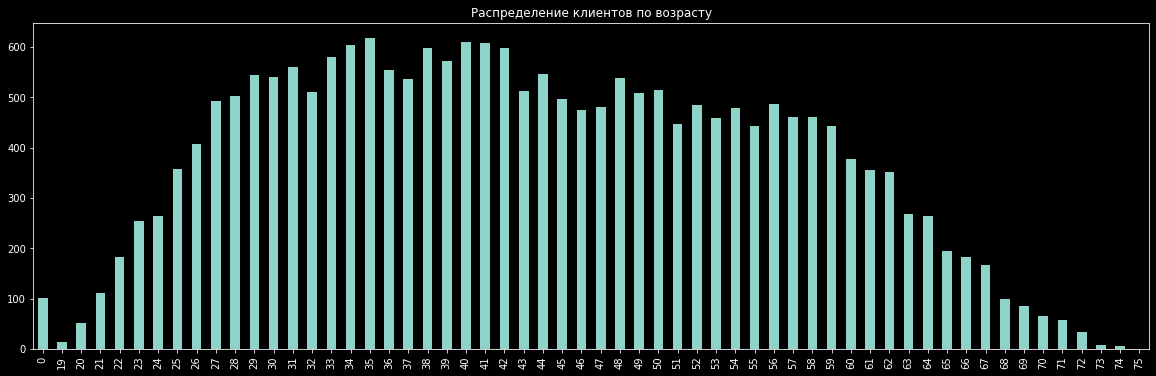

In [32]:
plt.title('Распределение клиентов по возрасту')
data['dob_years'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.show()

В столбце есть 101 значение равно 0. Предполагаю, что эо так же техническая ошибка. Заменим 0 на среднее значение по столбцу или медиану.

In [33]:
data['dob_years'] = data['dob_years'].replace({0:data['dob_years'].median()})

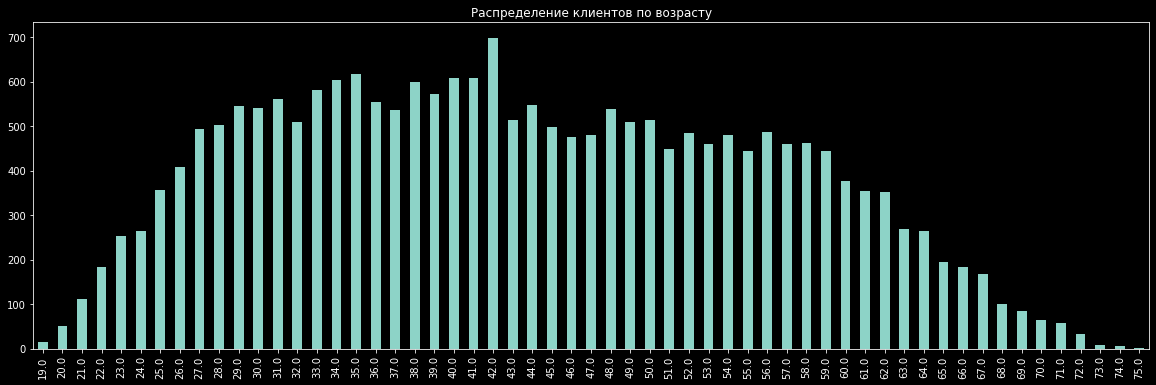

In [34]:
plt.title ('Распределение клиентов по возрасту')
data['dob_years'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.show()

**Вывод**

В таблице присутствовало множество дубликатов. Мы удалили дубликаты приведя все знаки в строках к нижнему регистру, в ручном режиме объеденили некоторые группы значений, заменили отсутствующие значения на средние по столбцу. Данные дубликаты возникали в связи с техническими ошибками. Скорее всего эти данные в систему заводили специалисты банка и каждый специалист заводил по своему.

### Лемматизация

Для лемматизацмм будем использовать бибилитеку pymystem3. 

Создадим функию для лемматизации значений

In [35]:
def lemmatize(str):
    return ' '.join(m.lemmatize(str))


In [36]:
data['lemm_purpose'] = data['purpose'].apply(lemmatize)
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemm_purpose
0,1,8437,42.0,высшее,0,женат / замужем,0,f,сотрудник,0,253875.639453,покупка жилья,покупка жилье \n
1,1,4024,36.0,среднее,1,женат / замужем,0,f,сотрудник,0,112080.014102,приобретение автомобиля,приобретение автомобиль \n
2,0,5623,33.0,среднее,1,женат / замужем,0,m,сотрудник,0,145885.952297,покупка жилья,покупка жилье \n


С помощью метода apply пременим фунцию для лемматизации слов в столбце purpose.

In [37]:
data['lemm_purpose']

0                         покупка   жилье \n
1               приобретение   автомобиль \n
2                         покупка   жилье \n
3            дополнительный   образование \n
4                       сыграть   свадьба \n
                        ...                 
21520                операция   с   жилье \n
21521             сделка   с   автомобиль \n
21522                        недвижимость \n
21523    на   покупка   свой   автомобиль \n
21524           на   покупка   автомобиль \n
Name: lemm_purpose, Length: 21525, dtype: object

**Вывод**

Применив созданную нами фенкцию Lemmatize для лемматизции значений в столбце purpose, можно выделить несколько целей кредита - Автомобиль, жилье, недвижимость, свадьба, образование. Разобьем целина эти категории.

### Категоризация данных

Для наглядности последующих расчетов, разобьем на категории столбцы lemm_purpose, dob_years, children, total_income, .

In [38]:
def lem_group(word):
    if 'свадьба' in word:
        return 'кредит на общие нужды'
    elif 'образование' in word:
        return 'кредит на образование'
    elif 'жилье' in word or 'недвижимость' in word or "жильё" in word:
        return 'кредит на недвижимость'
    elif 'автомобиль' in word:
        return 'автокредит'
    else:
        return 'нужно проверить лемму'

In [39]:
data['lemm_purpose_group'] = data['lemm_purpose'].apply(lem_group)
data['lemm_purpose_group'].value_counts()

кредит на недвижимость    10840
автокредит                 4315
кредит на образование      4022
кредит на общие нужды      2348
Name: lemm_purpose_group, dtype: int64

Цели кредита разделили исходя из текущих видов кредитования в банках. Кредит на авто - Автокердит, кредит на приобретение жилья - кредит на недвижимость, кредит на разные цели -кредит на общие нужды, на образование -  "кредит на образование"

Категоризируем возраст клиента на молодых, взрослых и старых. Эти значения пригодяться для оценки взаимосвязи между возрастом заемщиков и возвратом кдита в срок. Для этого создадим фнкцию age_group и применим к соответствующему столбцу.

In [40]:
def age_group(age):
    if age <= 30:
        return 'молодой'
    elif age <= 64:
        return 'взрослый'
    elif age >= 65:
        return 'старый'
    else:
        return 'нужно проверить значение'
    
       

In [41]:
data['dob_age_group'] = data['dob_years'].apply(age_group)
data['dob_age_group'].value_counts()


взрослый    16903
молодой      3723
старый        899
Name: dob_age_group, dtype: int64

Категоризируем количество детей клиента на бездетных и с детьми . Эти значения пригодяться для оценки взаимосвязи между количеством детей у заемщиков и возвратом кдита в срок. Для этого создадим фнкцию children_group и применим к соответствующему столбцу.

In [42]:
def children_group(children):
    try:
        if children == 0:
            return 'бездетные'
        else:
            return 'есть дети'
               
    except:
        return 'нужно проверить'

In [43]:
data['dob_children_group'] = data['children'].apply(children_group)
data['dob_children_group'].value_counts()

бездетные    14149
есть дети     7376
Name: dob_children_group, dtype: int64

Категоризируем доход клиента на без дохода, бехных, со средним доходом и с высоким доходом. Эти значения пригодяться для оценки взаимосвязи между доходом у заемщиков и возвратом кдита в срок. Для этого создадим фнкцию total_income_group и применим к соответствующему столбцу.

In [44]:
def total_income_group(total_income):
    if total_income == 0:
        return 'без дохода'
    elif total_income <= 50000:
        return 'бедный'    
    elif total_income < 100000:
        return 'средний доход'
    elif total_income >= 100000:
         return 'высоких доход'
    else:
        return 'нужно проверить значение'

In [45]:
data['total_income_group'] = data['total_income'].apply(total_income_group)
data['total_income_group'].value_counts()

высоких доход    17062
средний доход     4091
бедный             372
Name: total_income_group, dtype: int64

Сгруппируем данные семейного положения, пусть 0 будет не женат, все остальное 1.

In [46]:
data['family_status_group'] = data['family_status_id'].isin([1,2,3,4])*1

In [81]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemm_purpose,lemm_purpose_group,dob_age_group,dob_children_group,total_income_group,family_status_group
0,1,8437,42.0,высшее,0,женат / замужем,0,f,сотрудник,0,253875.639453,покупка жилья,покупка жилье \n,кредит на недвижимость,взрослый,есть дети,высоких доход,0
1,1,4024,36.0,среднее,1,женат / замужем,0,f,сотрудник,0,112080.014102,приобретение автомобиля,приобретение автомобиль \n,автокредит,взрослый,есть дети,высоких доход,0
2,0,5623,33.0,среднее,1,женат / замужем,0,m,сотрудник,0,145885.952297,покупка жилья,покупка жилье \n,кредит на недвижимость,взрослый,бездетные,высоких доход,0
3,3,4124,32.0,среднее,1,женат / замужем,0,m,сотрудник,0,267628.550329,дополнительное образование,дополнительный образование \n,кредит на образование,взрослый,есть дети,высоких доход,0
4,0,340266,53.0,среднее,1,гражданский брак,1,f,пенсионер,0,158616.077870,сыграть свадьбу,сыграть свадьба \n,кредит на общие нужды,взрослый,бездетные,высоких доход,1


**Вывод**

Для выполнения последующего задания мы категоризировали данные в необходимых нам столбца. Категоризация поможет нам выявить влияние данных нам параметров на возврат кредита в срок. Для этого мы создали ряд функций для каждого слобца сожержащих несколько условий.

## Шаг 3. Ответим на вопросы

### Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [48]:
data['debt'].mean()

0.08088269454123112

В общем по всей выборке мы имеем 8% должников.

Для выявления зависимости сгруппируем данные по полученному нами столбцу 'dob_children_group' и сделаем выводы по столбцу 'debt' с помощью вывода количества, среднего значения.

In [82]:
data.groupby('dob_children_group').agg({'debt': ['count','mean']}).style.highlight_max()


Мы видим, что количество должников на 2% выше у клиентов имеющих детей.

Предлагаю углубиться в данные и посмотреть есть корреляция возврата кредита у клиентов имеющих детей и нет в зависимости от вида кредита.

In [85]:
data.pivot_table(index=['dob_children_group'], columns= 'lemm_purpose_group', values='debt', aggfunc='mean').style.highlight_max()


lemm_purpose_group,автокредит,кредит на недвижимость,кредит на образование,кредит на общие нужды
dob_children_group,,,,
бездетные,0.085203,0.067071,0.086448,0.074146
есть дети,0.109364,0.081753,0.102695,0.089084


В целом мы так же видим что, бездетные платят лучше, так же видим что хуже платят клиенты с детьмя взявщие автокредит и кредит на образование, чем клиенты в целом.

Если посмотреть на данные в разрезе получаемого дохода, видим что так же бездетные платят лучше.

In [86]:
data.pivot_table(index=['dob_children_group'], columns= 'total_income_group', values='debt', aggfunc='mean').style.highlight_max()


total_income_group,бедный,высоких доход,средний доход
dob_children_group,,,
бездетные,0.053846,0.075870,0.074167
есть дети,0.080357,0.091382,0.095385


### Есть ли зависимость между семейным положением и возвратом кредита в срок?

Для выявления зависимости сгруппируем полученый нами столбец 'family_status_id' и сделаем выводы по столбцу 'debt' с помощью вывода количества, суммы и среднего значения.

In [87]:
data.groupby('family_status_group').agg({'debt': ['count','mean']}).style.highlight_max()

Сгруппируем те же даннве но более подробно, оценим выборки клиентов. 

In [90]:
data_pivot_f = data.pivot_table(index=['family_status_group'], columns = 'debt', values='days_employed', aggfunc='count')
data_pivot_f.reset_index()
data_pivot_f['Количество заемщиков в группе'] = data_pivot_f[0] + data_pivot_f[1]
data_pivot_f['доля должников в %'] = data_pivot_f[1] / data_pivot_f['Количество заемщиков в группе'] * 100
data_pivot_f.sort_values(by = 'доля должников в %', ascending = False).style.highlight_max()

debt,0,1,Количество заемщиков в группе,доля должников в %
family_status_group,,,,
1,8335,810,9145,8.857299
0,11449,931,12380,7.520194


Вывод, женатые на 1% чаще не выплачивают кредиты. Учитывая, что средняя просрочка по все выборке 8% можно сделать вывод,что семейное положение не влияет на вероятность возврата кредита

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [95]:
data.groupby('total_income_group').agg({'debt': ['count', 'mean'],}).style.background_gradient()

In [94]:
data_pivot_t = data.pivot_table(index=['total_income_group'], columns = 'debt', values='days_employed', aggfunc='count')
data_pivot_t.reset_index()
data_pivot_t['Количество заемщиков в группе'] = data_pivot_t[0] + data_pivot_t[1]
data_pivot_t['доля должников в %'] = data_pivot_t[1] / data_pivot_t['Количество заемщиков в группе'] * 100
data_pivot_t.sort_values(by = 'доля должников в %', ascending = False).style.background_gradient()

debt,0,1,Количество заемщиков в группе,доля должников в %
total_income_group,,,,
высоких доход,15675,1387,17062,8.129176
средний доход,3760,331,4091,8.090931
бедный,349,23,372,6.182796


Вывод, бедные возвращают кредиты на 2% лучше, чем остальные. Клиенты с высоким и средним доходом, так же не выходят за рамки общего среднего размера доли просрочки.

- Как разные цели кредита влияют на его возврат в срок?

In [93]:
data.groupby('lemm_purpose_group').agg({'debt': ['count', 'mean'],}).style.background_gradient()

In [96]:
data_pivot_p = data.pivot_table(index=['lemm_purpose_group'], columns = 'debt', values='days_employed', aggfunc='count')
data_pivot_p.reset_index()
data_pivot_p['Количество заемщиков в группе'] = data_pivot_p[0] + data_pivot_p[1]
data_pivot_p['доля должников в %'] = data_pivot_p[1] / data_pivot_p['Количество заемщиков в группе'] * 100
data_pivot_p.sort_values(by = 'доля должников в %', ascending = False).style.background_gradient()

debt,0,1,Количество заемщиков в группе,доля должников в %
lemm_purpose_group,,,,
автокредит,3912,403,4315,9.339513
кредит на образование,3652,370,4022,9.199403
кредит на общие нужды,2162,186,2348,7.921635
кредит на недвижимость,10058,782,10840,7.214022


**Вывод**

<div class="alert alert-block alert-info">
    
С помощью сводной таблицы определили доли должников в каждой группе. Сровнив полученные доли видим что максимальное и минимальное значение отличаеться на 2%. По автокредитам просрочки возникают у 9,3% заемщиков, по кредитам на недвижимость у 7,2 % заемщиков. Думаю взаимосвязь незначительная. 
</div>

### Catboost

In [58]:
%pip install catboost

     |████████████████████████████████| 76.1 MB 71.7 MB/s 


In [59]:
train = data.sample(frac=0.7,random_state=42).copy()

In [60]:
val = data[~data.index.isin(train.index)].copy()

In [61]:
data.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose', 'lemm_purpose', 'lemm_purpose_group',
       'dob_age_group', 'dob_children_group', 'total_income_group',
       'family_status_group'],
      dtype='object')

In [62]:
X_col = ['children', 'days_employed', 'dob_years', 'education', 
       'family_status', 'gender', 'income_type',
       'total_income', 'purpose']
y_col = ['debt']
cat_features = ['education', 'family_status', 'gender', 'income_type', 'purpose']

In [63]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=100)

In [64]:
model.fit(train[X_col],train[y_col],
          
          eval_set=(val[X_col],val[y_col]),

          cat_features=cat_features
          )

Learning rate set to 0.061927
0:	learn: 0.6311789	test: 0.6313755	best: 0.6313755 (0)	total: 102ms	remaining: 1m 42s
100:	learn: 0.2652238	test: 0.2751054	best: 0.2750695 (99)	total: 1.93s	remaining: 17.1s
200:	learn: 0.2564349	test: 0.2752236	best: 0.2748152 (151)	total: 3.54s	remaining: 14.1s
300:	learn: 0.2487991	test: 0.2766217	best: 0.2748152 (151)	total: 5.28s	remaining: 12.3s
400:	learn: 0.2407642	test: 0.2775884	best: 0.2748152 (151)	total: 9.3s	remaining: 13.9s
500:	learn: 0.2331721	test: 0.2790260	best: 0.2748152 (151)	total: 13.8s	remaining: 13.7s
600:	learn: 0.2254975	test: 0.2800057	best: 0.2748152 (151)	total: 18.3s	remaining: 12.2s
700:	learn: 0.2179037	test: 0.2812655	best: 0.2748152 (151)	total: 23.1s	remaining: 9.84s
800:	learn: 0.2112815	test: 0.2827153	best: 0.2748152 (151)	total: 27.8s	remaining: 6.91s
900:	learn: 0.2050240	test: 0.2834385	best: 0.2748152 (151)	total: 30.8s	remaining: 3.38s
999:	learn: 0.1990043	test: 0.2847243	best: 0.2748152 (151)	total: 32.5s	re

In [65]:
model.predict_proba(val[X_col])[:,1]

array([0.08289862, 0.0568552 , 0.09140005, ..., 0.06256002, 0.11664543,
       0.08919351])

In [66]:
val['score_cat'] = model.predict_proba(val[X_col])[:,1]

In [67]:
fi = pd.DataFrame({'w':model.feature_importances_,'name':X_col})

In [68]:
fi.sort_values('w',ascending=False,inplace=True)

In [69]:
fi

,w,name
3,18.598993,education
8,16.166976,purpose
1,12.933326,days_employed
5,11.555610,gender
2,11.511732,dob_years
4,10.461121,family_status
7,7.959885,total_income
6,5.695443,income_type
0,5.116914,children


In [70]:
model.predict_proba(val[X_col])[:,1]

array([0.08289862, 0.0568552 , 0.09140005, ..., 0.06256002, 0.11664543,
       0.08919351])

### SQL

In [ ]:
!wget https://www.sqlite.org/src/tarball/sqlite.tar.gz?r=release -O sqlite.tar.gz
!tar xzf sqlite.tar.gz
%cd sqlite/
!./configure
!make sqlite3.c
%cd /content
!npx degit coleifer/pysqlite3 -f
!cp sqlite/sqlite3.[ch] .
!python setup.py build_static build
!cp build/lib.linux-x86_64-3.6/pysqlite3/_sqlite3.cpython-36m-x86_64-linux-gnu.so \
    /usr/lib/python3.6/lib-dynload/_sqlite3.cpython-36m-x86_64-linux-gnu.so

In [72]:
import sqlite3

In [73]:
sqlite3.sqlite_version

'3.22.0'

In [74]:
conn = sqlite3.connect('db')
cur = conn.cursor()

In [75]:
def select(sql):
  return pd.read_sql(sql,conn)

Теперь зальем таблу и проверим, что все ок

In [76]:
data.to_sql('ecommerce',conn,index=False,if_exists='replace')

In [77]:
sql = '''select count(*) from ecommerce t'''

In [78]:
select(sql)

,count(*)
0,21525


In [79]:
sql = '''select * from ecommerce t limit 5'''

In [80]:
select(sql).dtypes

children                 int64
days_employed            int64
dob_years              float64
education               object
education_id             int64
family_status           object
family_status_id         int64
gender                  object
income_type             object
debt                     int64
total_income           float64
purpose                 object
lemm_purpose            object
lemm_purpose_group      object
dob_age_group           object
dob_children_group      object
total_income_group      object
family_status_group      int64
dtype: object

## Шаг 4. Общий вывод


<div class="alert alert-block alert-info">
<b>Комментарий от студента</b> <a class="tocSkip"></a>
    
    
Нам была дана таблица с информацией о заемщика имющих разные параметры. Нам было необходимо определить как влияет семейное положение, количество детей, уровень доходаи, цель кредина на возврат кредита в срок. Для этого мы проанализировали таблицу, выявили пропуски и земенили на среднее значение по соответствующей группе, визуально определили дубликаты, часть дубликатов удалили, часть из них исчезла после приведения стороки к нижнему регистру, заменили неправдоподобные значения. Используя инструмены pandas мы убрали весь мусор и привели данные к необходимому типу. Затем катологизировали данные для более наглядного расчета необходимых параметров. Используя группировку данных по заданным столбцам мы вывели выводы по столбу 'dept' через количество, сумму и среднее значение, что позволило нам заявить об присутствии связи между количеством детей и возвратом кредита в срок. К примеру 10 % заёмщиков имеющх 20 детей имеют просрочку по кредиту. С помощью сводных таблиц определи взамосвять не только между количеством детей и просрочкой, но и добавили взаимосвязь от возраста, дохода и цели кредита. 
    
    
   К примеру:
    - 18 % молодых заемщиков имеющих одного ребенка имеют еще и просроченную задолженность. Самые добропорядочные заемщики - старые заемщики без детей, всего 5 %.
    - почти 15% заемщиков имеющих 3 детей и берущих кредит на общие нужды плохо платят. Лучше всего платят заемщики имеющие 2 детей и берущие кредит на общие нужды - 5%.
    - Хуже всех платят бедные с 3 детьми - 20%. Лучше всех - бедные бездетные 5%.
   
</div>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.